In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plot_analysis_result as plot
import importlib
importlib.reload(plot)
import plot_vary_middle_analysis as middle_plot
importlib.reload(middle_plot)

input_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/vary_middle'
output_folder = f'{input_folder}/result_plots'
os.makedirs(output_folder, exist_ok=True)
result_df = middle_plot.read_all_result_files(input_folder)


       N     G  time_traverse_gene  label_time  vary_bin_kb  vary_fold  h_bin  \
0  15000  15.0                   3           3        0.002       0.25  0.001   
1  15000  15.0                   3           3        0.002       0.25  0.010   
2  15000  15.0                   3           3        0.002       0.25  0.100   
3  15000  15.0                   3           3        0.002       0.25  1.000   
4  15000  15.0                   3           3        0.002       0.25  2.000   

                                           elongf_fn  \
0  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
1  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
2  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
3  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   
4  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...   

                                           output_fn  mid_wMSE_simpleSolver  \
0  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...               0.352788   
1  /gladstone/enge

In [41]:
result_df.vary_bin_kb.unique()

array([2.e-03, 1.e-01, 2.e-01, 5.e-01, 1.e+00, 2.e+00, 3.e+00])

In [34]:
# check if there are any columns with missing values
print(result_df.columns[result_df.isnull().any()])

Index([], dtype='object')


## Plot1: Compare the performance of different solvers, across different true_h
- x_axis: true_h
- y_axis: wMSE
- hue: bins
- subplot: solver
- plot_type: boxplot


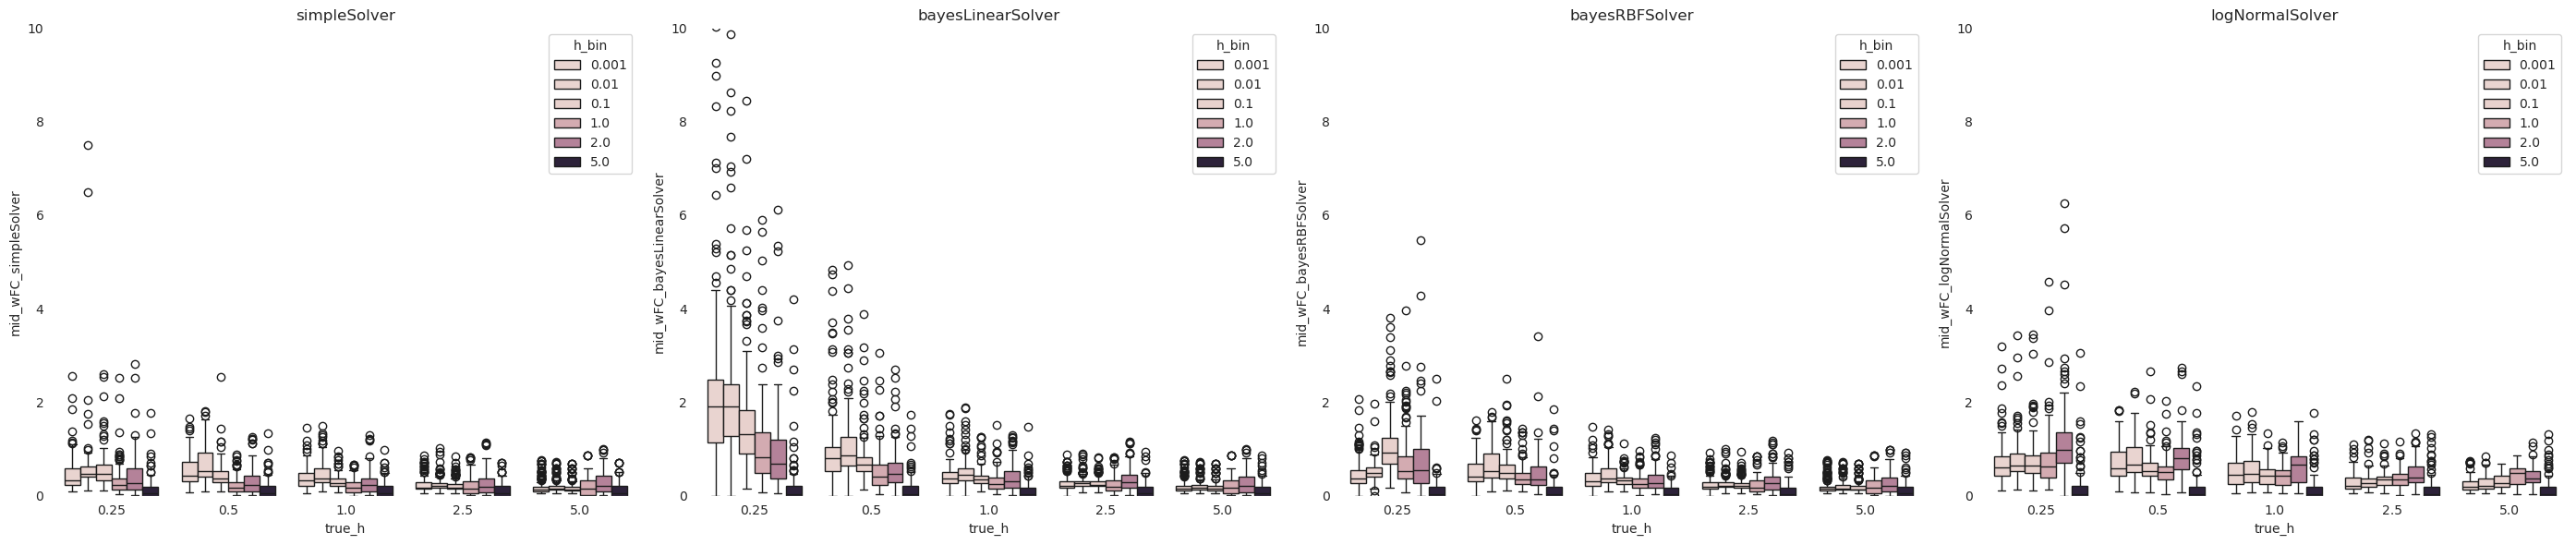

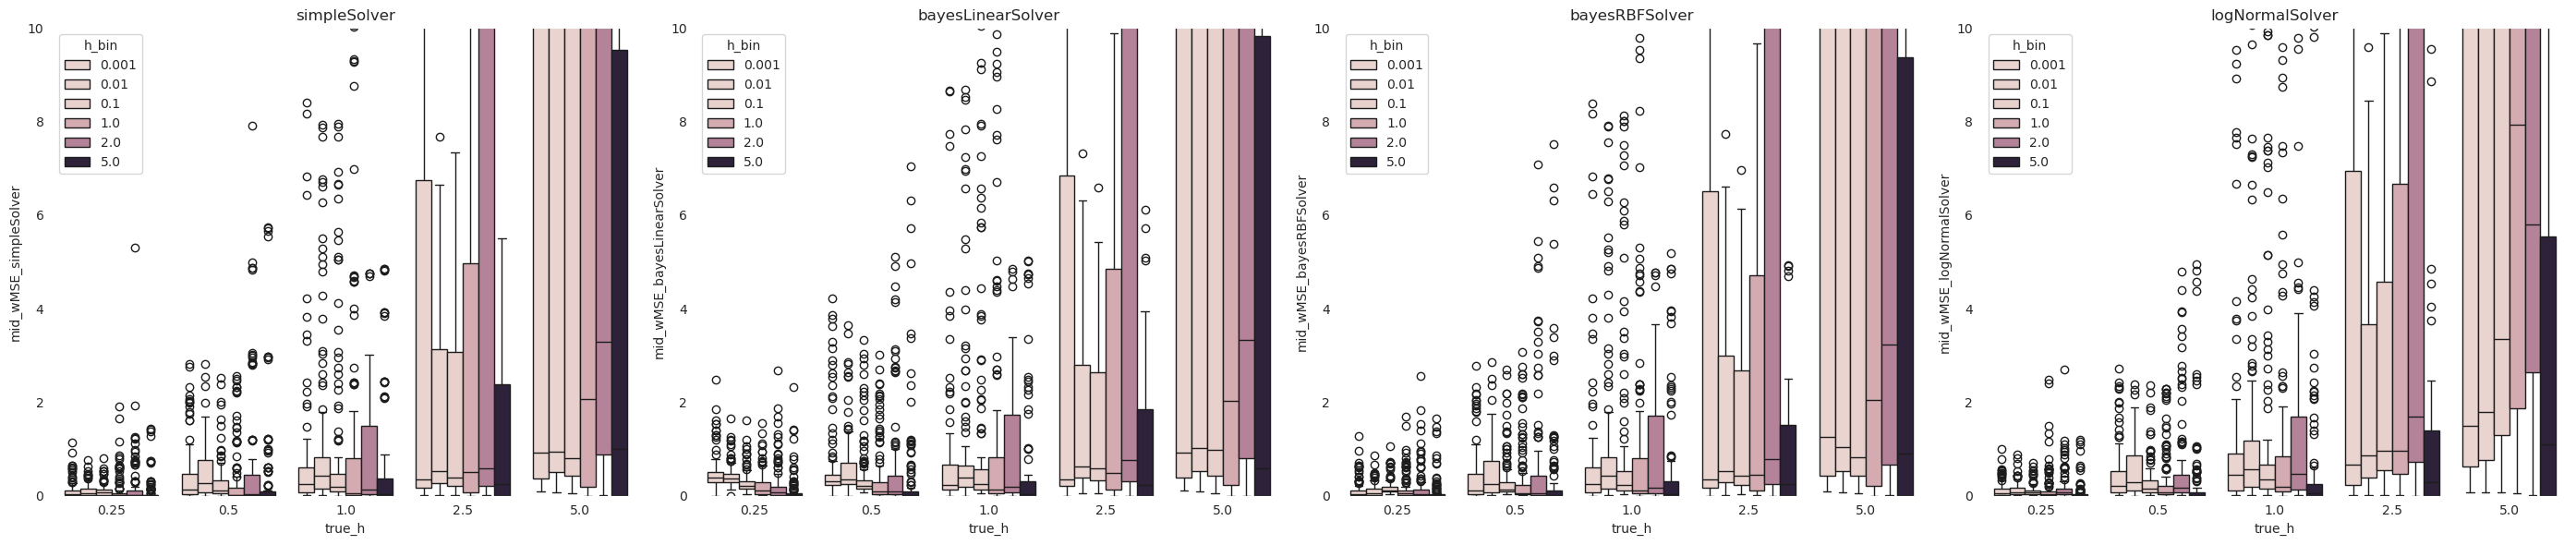

In [40]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

importlib.reload(plot)
importlib.reload(middle_plot)
middle_plot.plot1(result_df, metric='mid_wFC', save_fn = os.path.join(output_folder, 'wFC.png'))
middle_plot.plot1(result_df, metric='mid_wMSE', save_fn = os.path.join(output_folder, 'wMSE.pdf'))

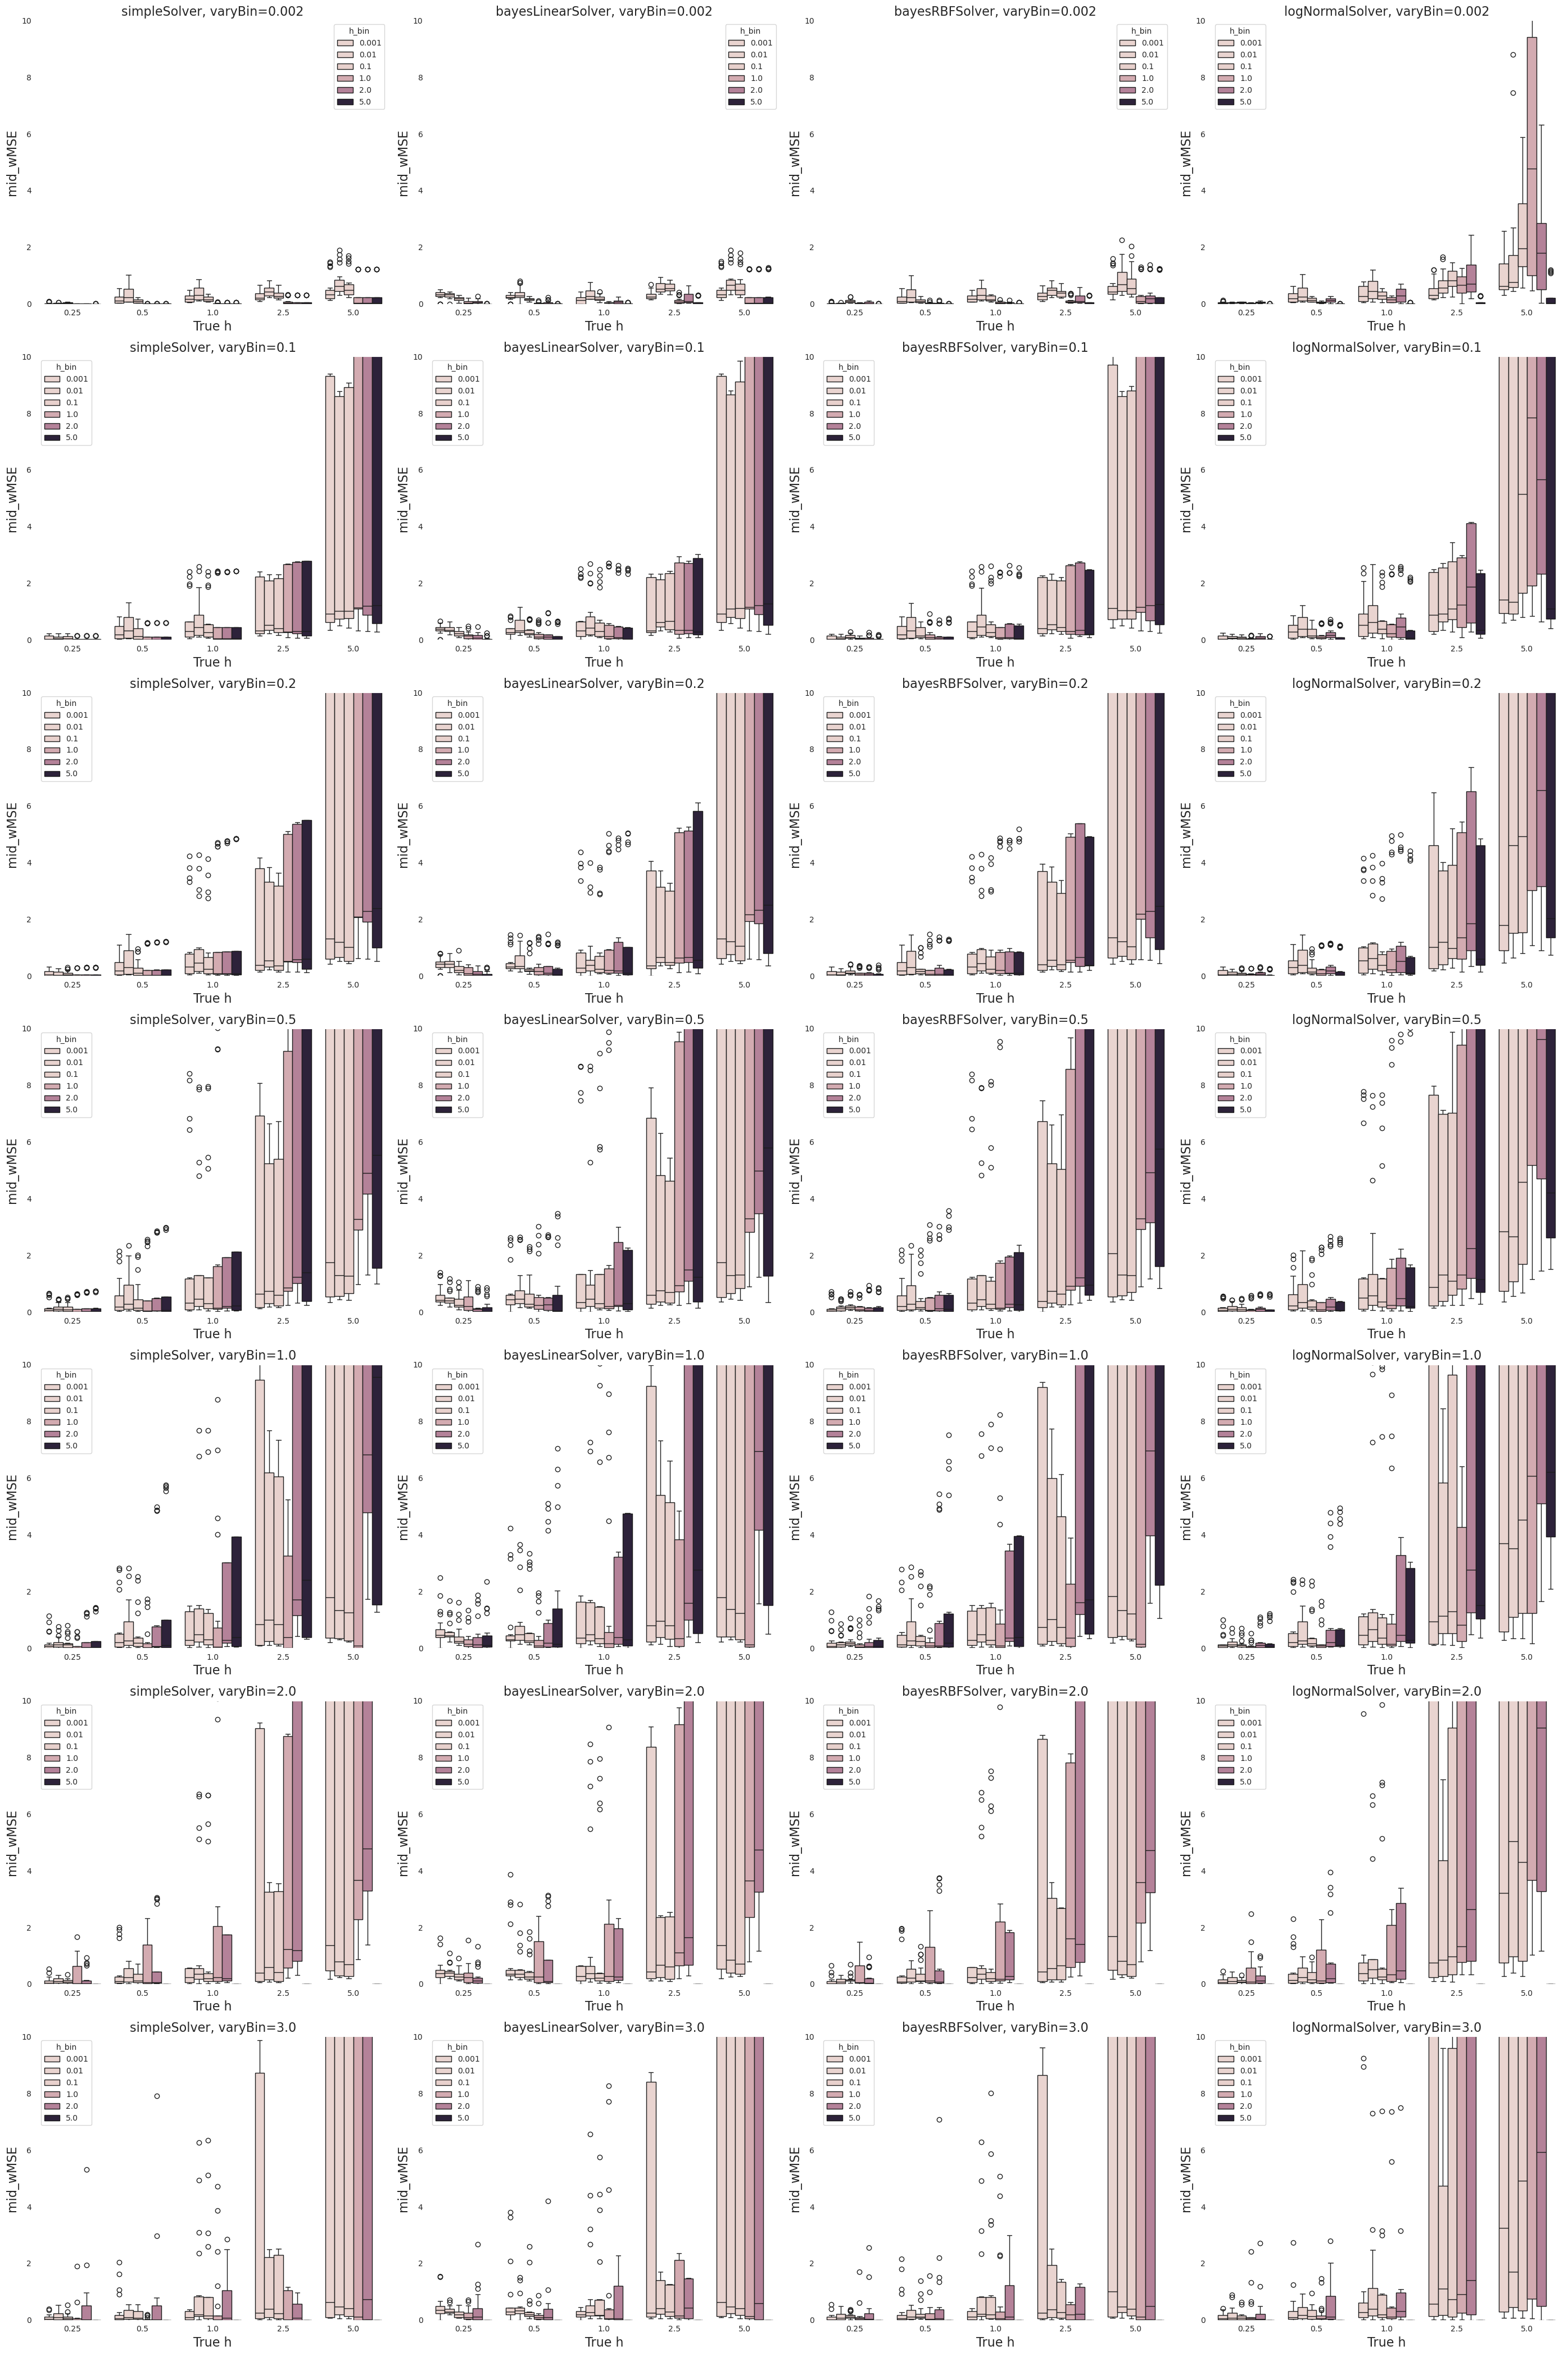

In [47]:
# plot 2: Compare the performance of different solvers, across different true_h such that we can see the effect of the vary_bin_kb
importlib.reload(middle_plot)
middle_plot.plot2(result_df, metric='mid_wMSE', save_fn = os.path.join(output_folder, 'wMSE_by_varyBin.png'))

In [25]:
# plot5: Compare the performance of different solvers, across different true_h for only one case:
import importlib
importlib.reload(plot)
run_fn_list = [f'{input_folder}/result_{i}.txt.gz' for i in range(108, 120)]
run_df_list = list(map(lambda x: plot.read_one_result_raw(x, result_df), run_fn_list))
run_df = pd.concat(run_df_list)

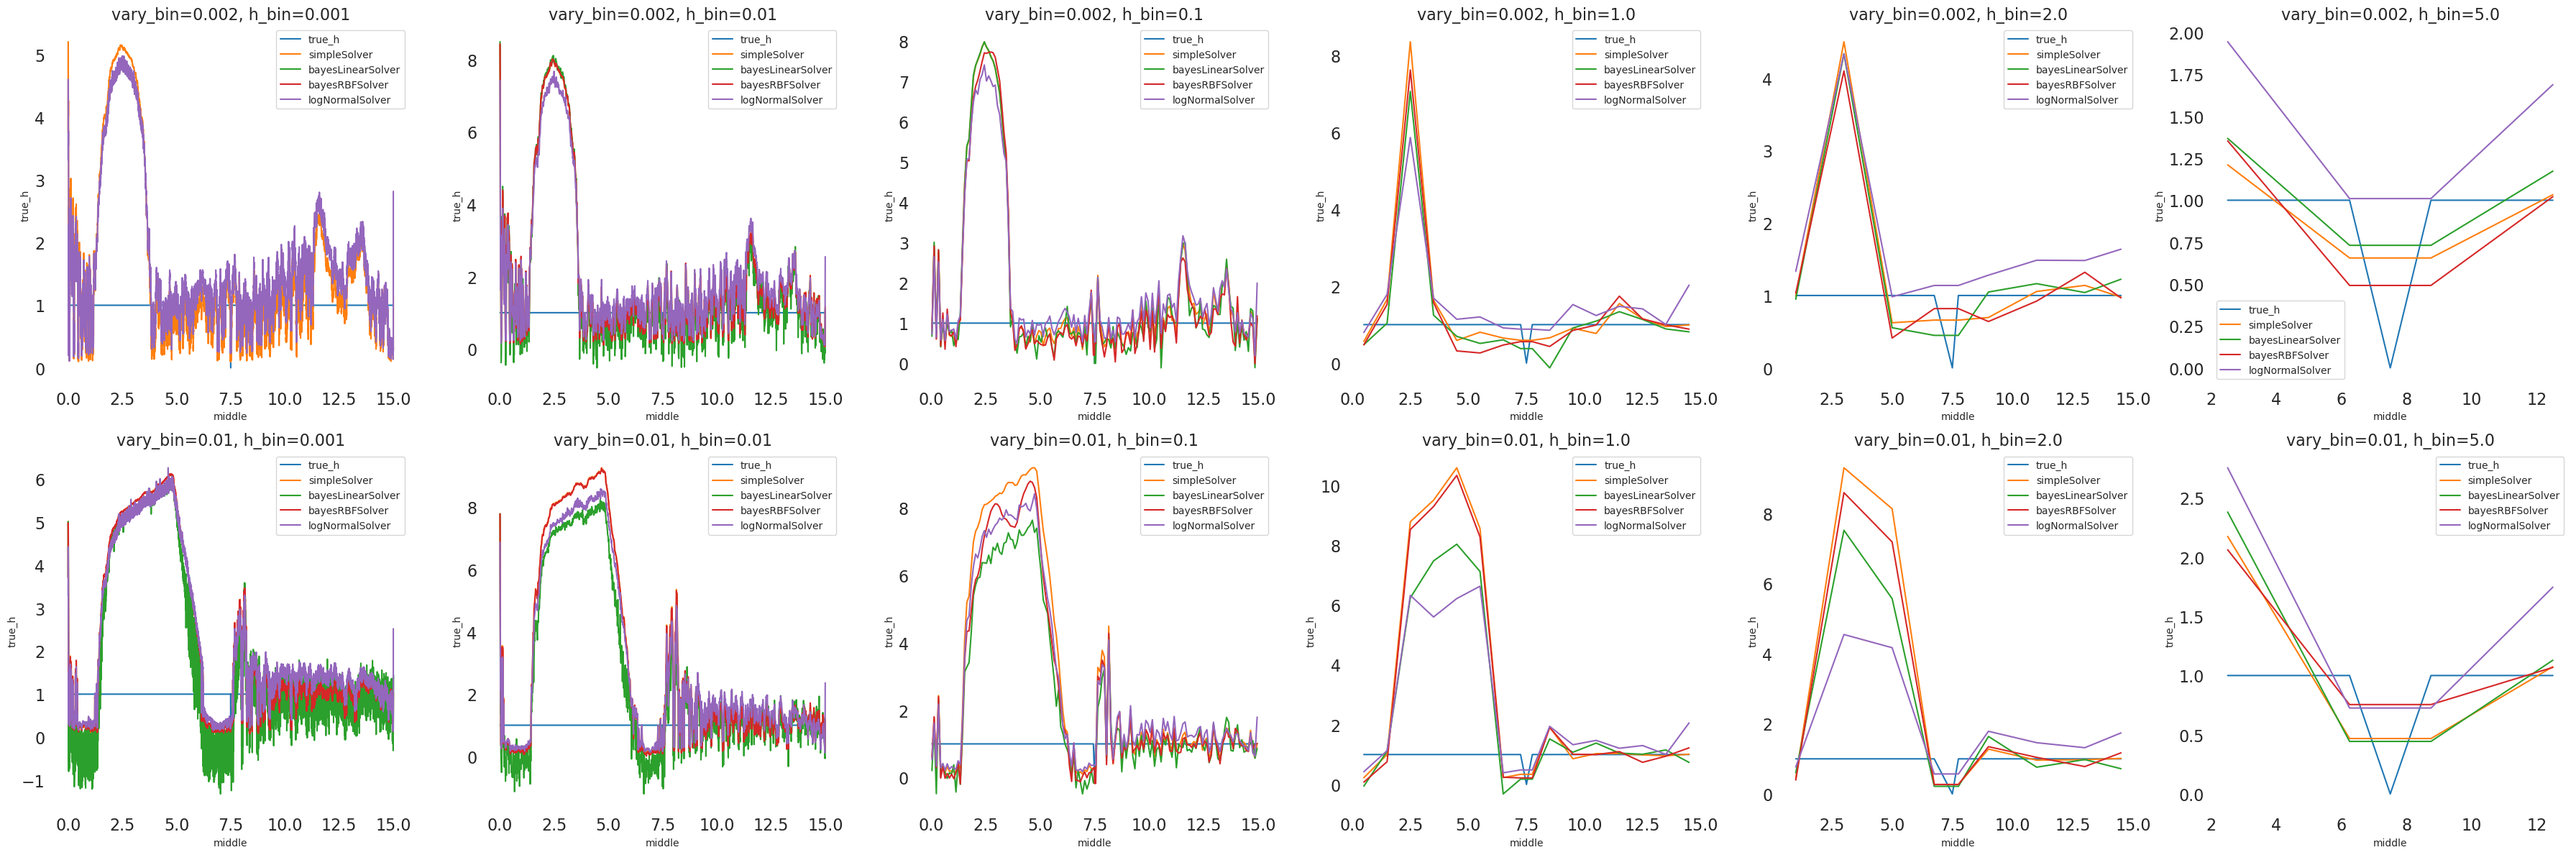

In [30]:
import importlib
importlib.reload(plot)
plot.plot5(run_df)

## plot2: For each ground truth values of elong_h, are there certain methods that do better than others?
- ax: true_h
- y_axis: wMSE
- hue: bins
- x_axis: solver
- plot_type: boxplot

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['wFC_simpleSolver', 'wFC_bayesLinearSolver', 'wFC_bayesRBFSolver', 'wFC_logNormalSolver']"

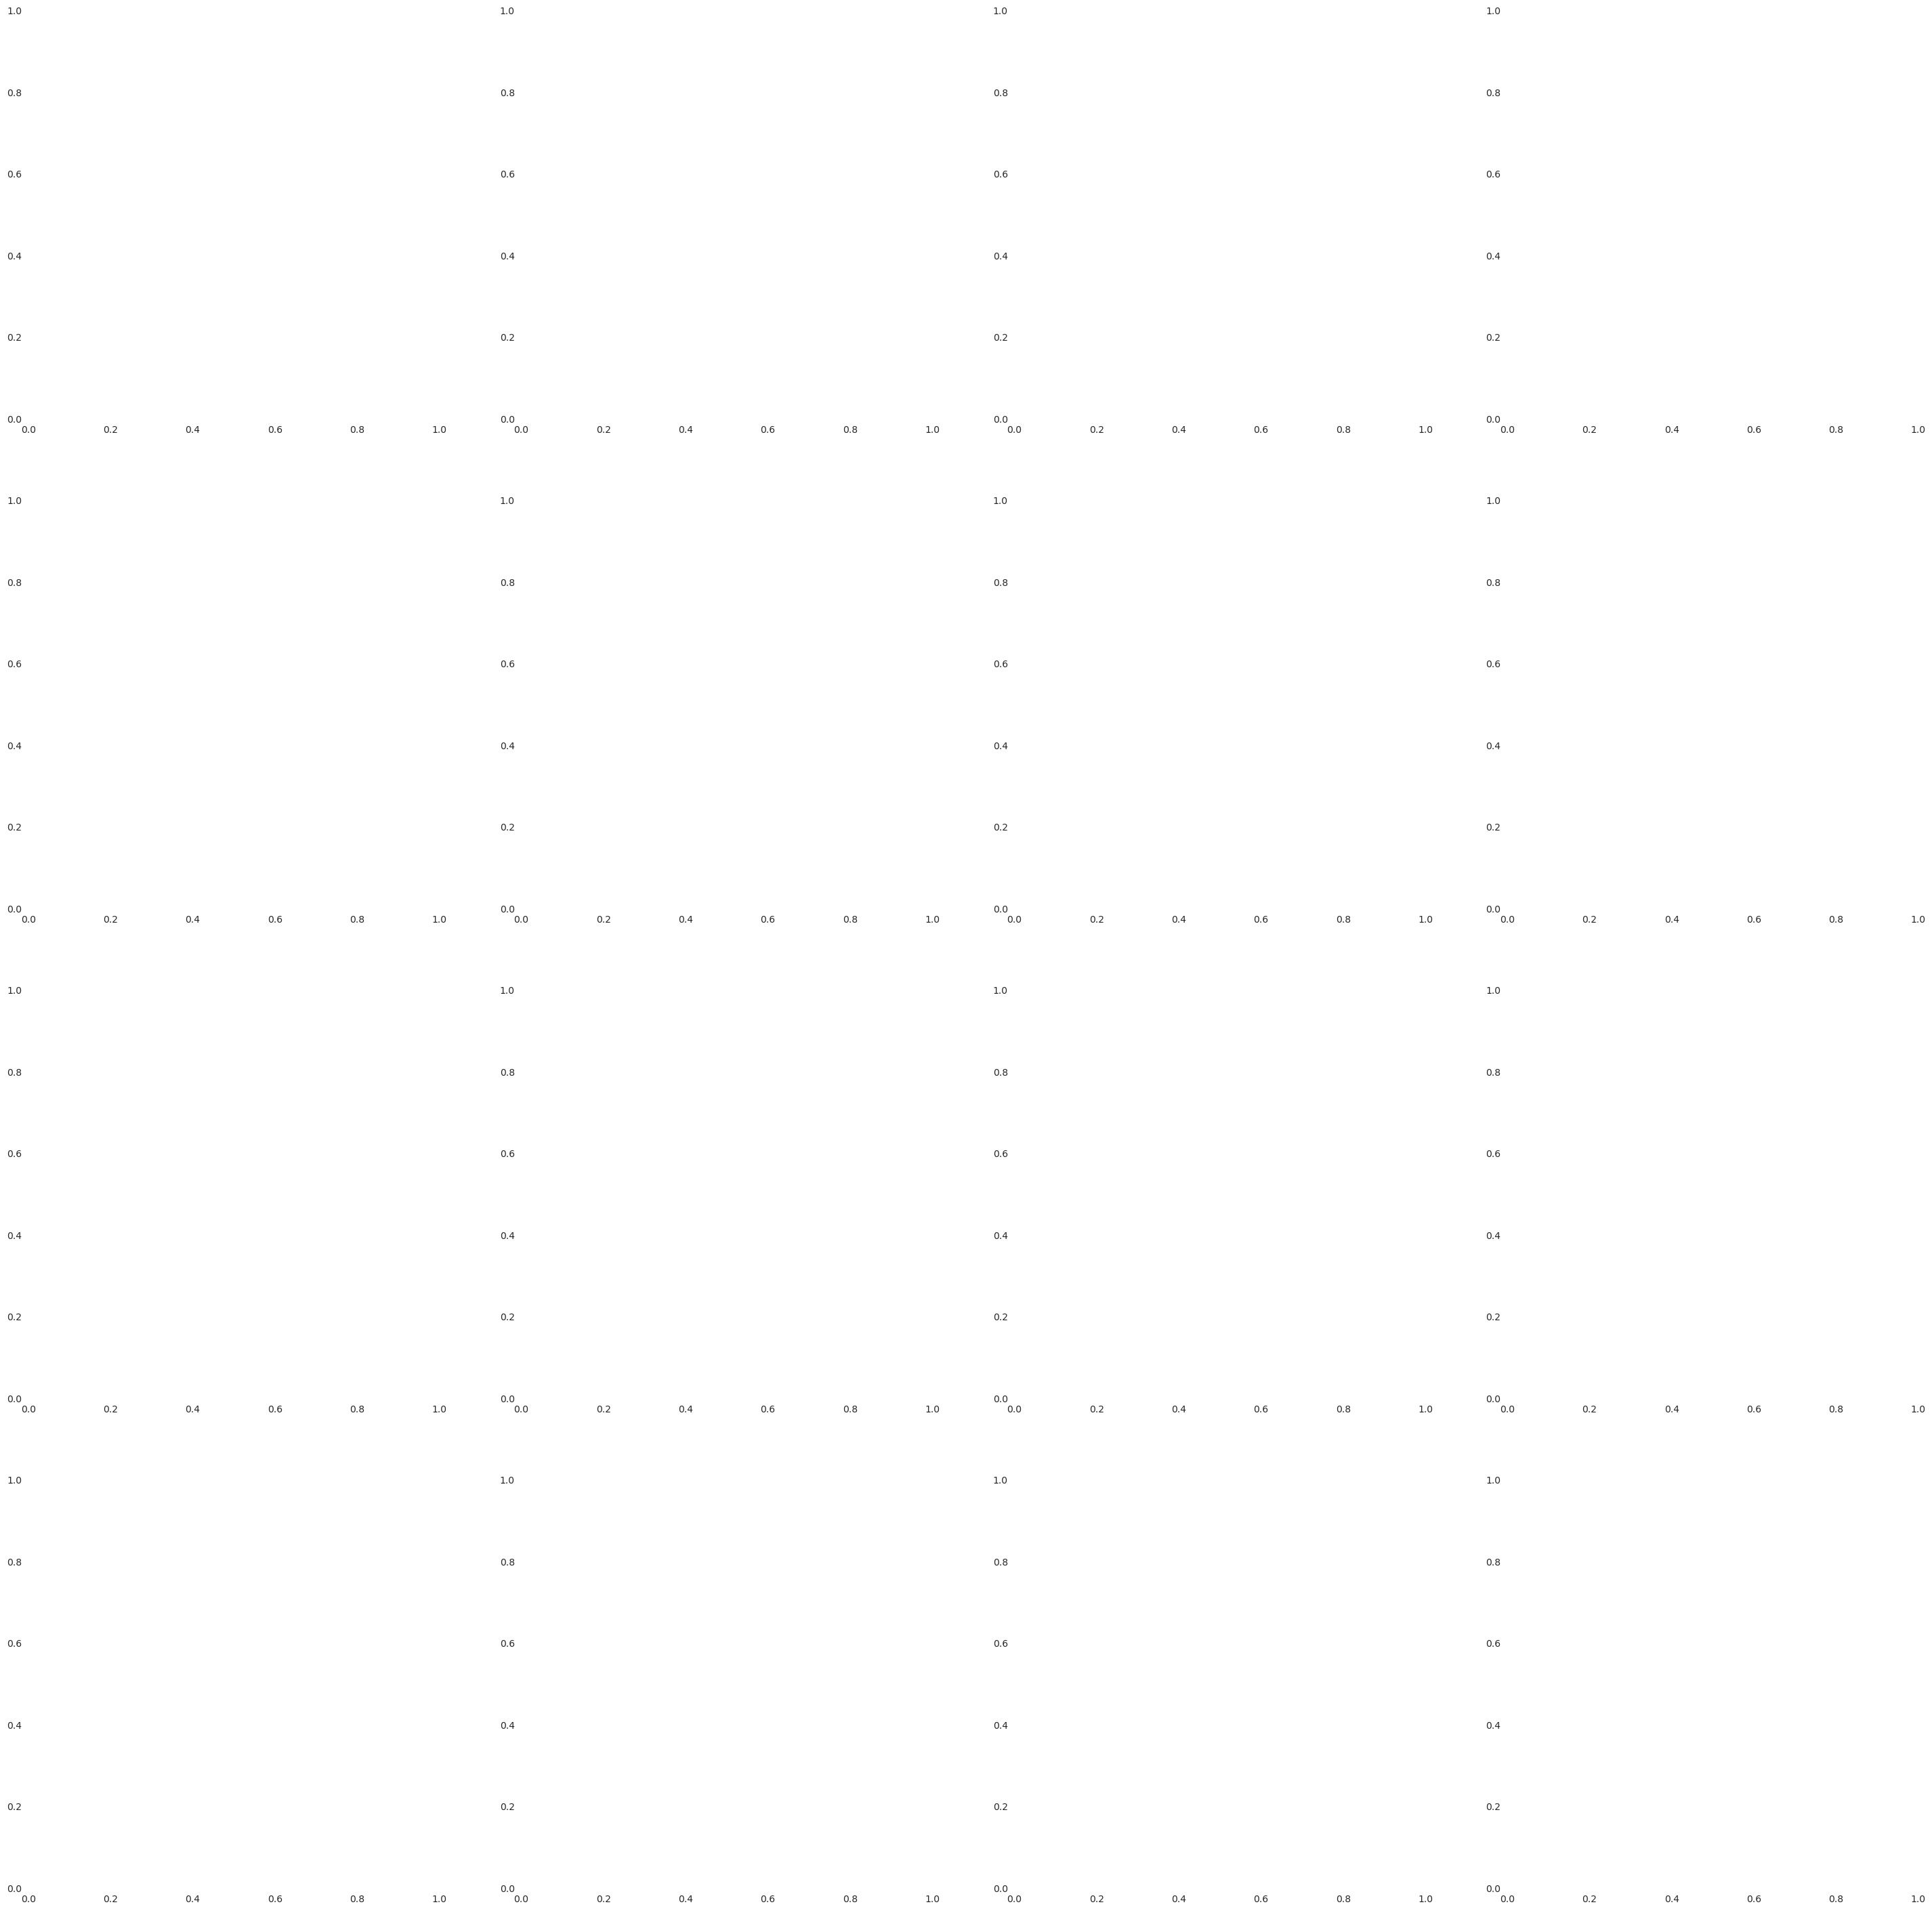

In [45]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

importlib.reload(plot)
plot.plot2(result_df, metric='wFC', save_fn = os.path.join(output_folder, 'wFC_by_trueH.png'))
plot.plot2(result_df, metric='wMSE', save_fn = os.path.join(output_folder, 'wMSE_by_trueH.png'))

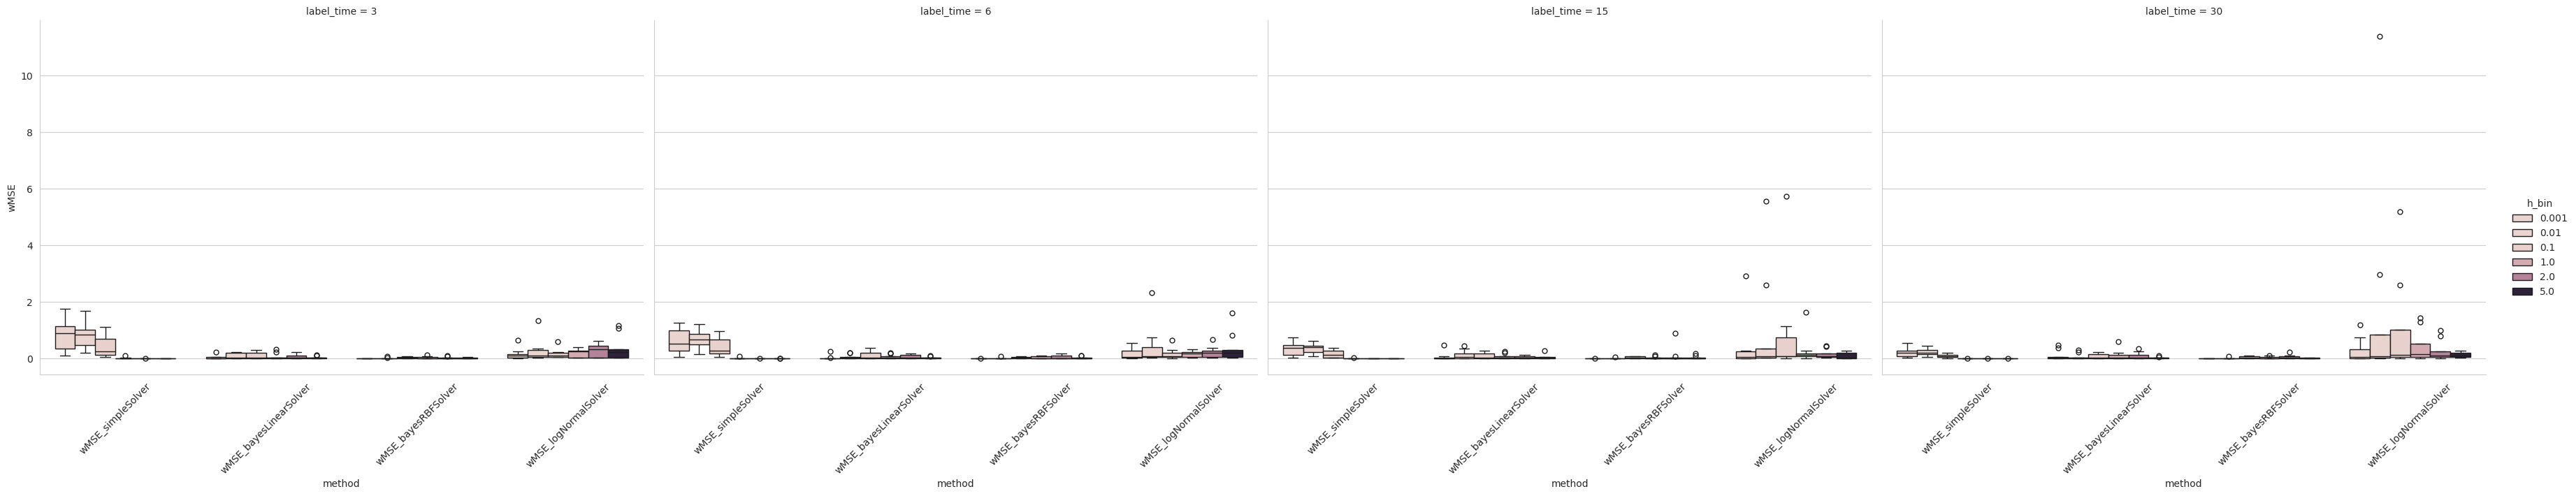

In [6]:
metric = 'wMSE'
true_h = 1
methods = ['simpleSolver', 'bayesLinearSolver', 'bayesRBFSolver', 'logNormalSolver']
result_df['true_h'] = result_df['G']/result_df['time_traverse_gene']
plot_df = result_df[result_df['true_h'] == true_h]
df = plot_df.melt(id_vars=['h_bin', 'label_time'], value_vars = [f'{metric}_{method}' for method in methods], var_name='method', value_name='wMSE')
# Specify desired figure dimensions in inches
fig_width = 9  # Width of the figure
fig_height = 6  # Height of the figure
# Calculate aspect ratio for sns.catplot
# For sns.catplot without facets, total figure width = height * aspect
aspect = fig_width / fig_height
# Create the catplot
g = sns.catplot(
    x='method',
    y='wMSE',
    hue='h_bin',
    col='label_time',
    data=df,
    kind='box',
    height=fig_height,
    aspect=aspect,
)
# Rotate x-axis labels
g.set_xticklabels(rotation=45)
plt.show()


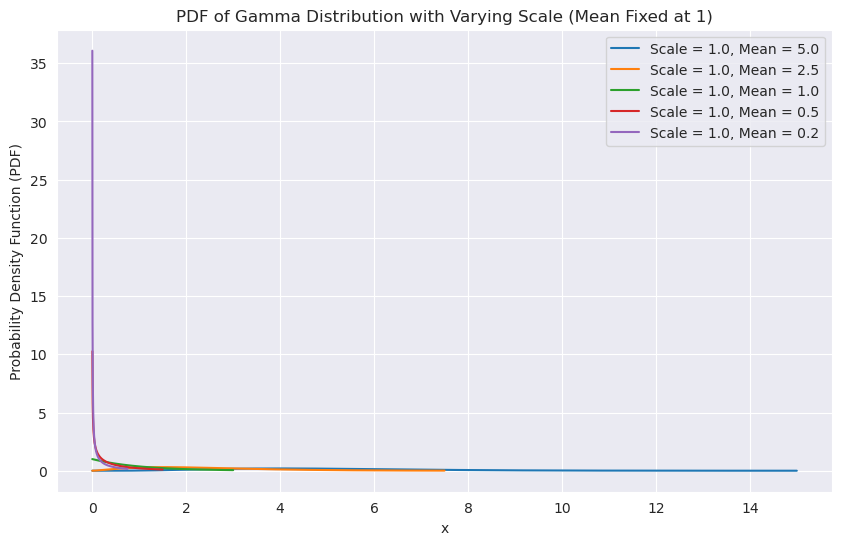

In [16]:
# for a particular case of a gene, plot the ground truth and predicted elongation rates and obeserve the stability of the different methodimport numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np
# Define the range of scale values to vary
scales = np.linspace(0.5, 2, 5)

# Define the range of x-values for plotting
means = [5, 2.5, 1, 0.5, 0.25]


# Plot the PDF of the Gamma distribution for each scale
plt.figure(figsize=(10, 6))

for mean in means:
    x = np.linspace(0, mean*3, 500)
    scale=1
    # For each scale, calculate the Gamma PDF with mean fixed at 1
    shape = mean/ scale
    pdf = gamma.pdf(x, a=shape, scale=scale)
    plt.plot(x, pdf, label=f'Scale = {scale:.1f}, Mean = {shape * scale:.1f}')

plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.title('PDF of Gamma Distribution with Varying Scale (Mean Fixed at 1)')
plt.legend()
plt.grid(True)
plt.show()

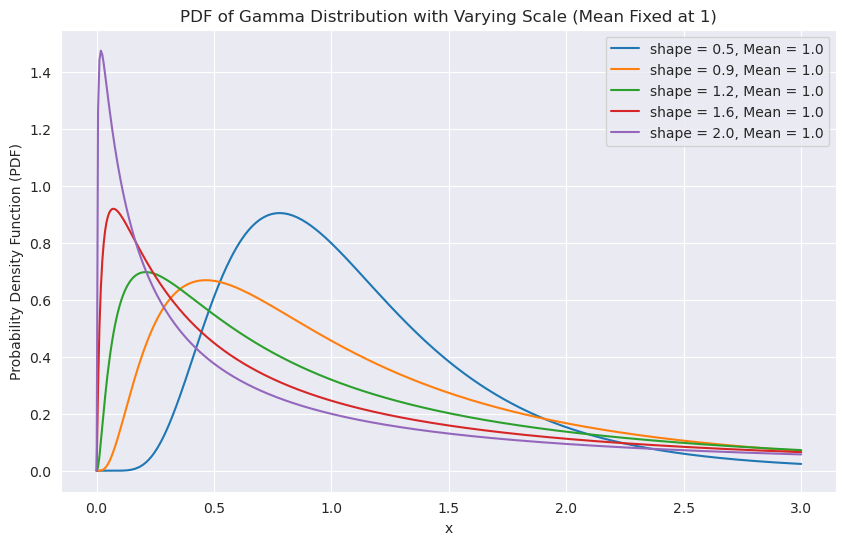

In [11]:
# for a particular case of a gene, plot the ground truth and predicted elongation rates and obeserve the stability of the different methodimport numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, lognorm
import numpy as np
# Define the range of scale values to vary
shapes = np.linspace(0.5, 2, 5)

# Define the range of x-values for plotting
mean = 1
x = np.linspace(0, mean*3, 500)

# Plot the PDF of the Gamma distribution for each scale
plt.figure(figsize=(10, 6))

for shape in shapes:
    pdf = lognorm.pdf(x, s = shape, scale=mean)
    plt.plot(x, pdf, label=f'shape = {shape:.1f}, Mean = {mean:.1f}')

plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.title('PDF of Gamma Distribution with Varying Scale (Mean Fixed at 1)')
plt.legend()
plt.grid(True)
plt.show()